<a href="https://colab.research.google.com/github/guptaprateek98/Capstone_CV_Risk_Prediction/blob/main/Capstone_CV_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


###*The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.*

###**Variables**

Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

##**Data Description**

##Demographic:

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

##Behavioral:

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

##Medical( history):

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke 
(Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

##Medical(current):

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

##Predict variable (desired target):

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
print(os.listdir())

['.config', 'drive', 'sample_data']


In [2]:
# mounting google drive
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dataf = pd.read_csv("/content/drive/MyDrive/CV_Risk_Prediction/data_cardiovascular_risk.csv") 

In [4]:
dataf.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
dataf.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


Here std's for all the features 

In [6]:
dataf.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

Here data contains null values can't be replaced with any logical values as this dataset containing health related information of person specific, it's rare that the data of any indivisual coincide with other one. hence logical solution is to remove rows with null values.

In [7]:
# dropping the missing value.
dataf = dataf.dropna(how = "any")

In [10]:
dataf.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [11]:
# Checking for the duplicate values
len(dataf[dataf.duplicated()])

0

Thus no duplicate values are present in given dataset.


In [12]:
#here 'id' and 'education' features are irrelevent w.r.t. Heart Problem 
#removing 'id' and 'education' features from dataset
dataf.drop(['id', 'education'], axis=1, inplace=True)

In [13]:
dataf.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


###Renaming of target variable

In [14]:
dataf = dataf.rename(columns={'TenYearCHD':'Heart_Disease'})

# **Exploratory Data Analysis**

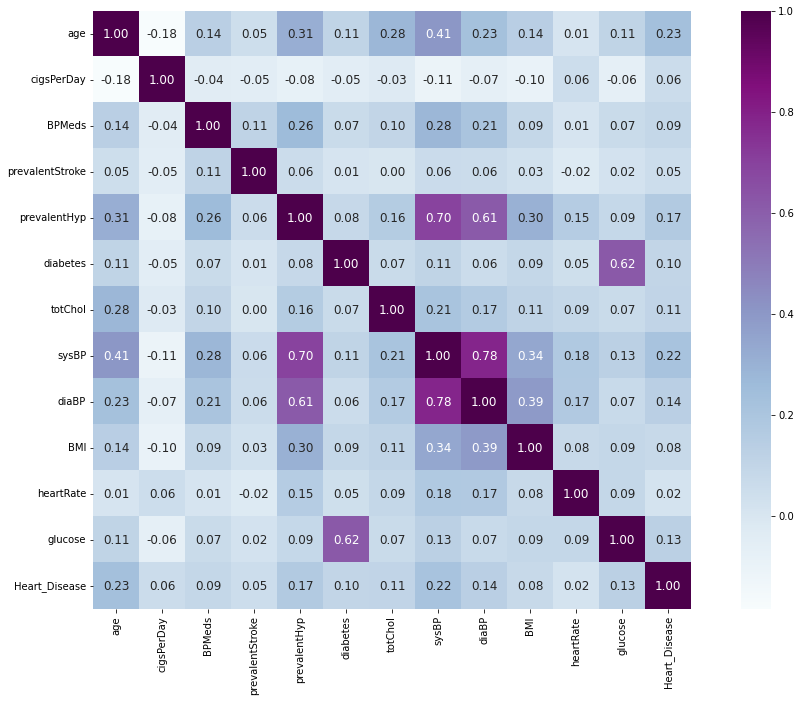

In [15]:
# ploting heat map finding correlation between columns
cdf = dataf.corr()

plt.subplots(figsize=(18, 11))
sns.heatmap(cdf,annot = True, cmap="BuPu",fmt='.2f', annot_kws={'size': 12},  vmax=1, square=True);

**Here sysBP and DiaBP are correlated so dealing with them by merging them to creat a new feature**

In [16]:
# Combining systolic and diastolic blood pressure column through formula 
dataf['map']=round((dataf['sysBP']+2*dataf['diaBP'])/3,3) # calculating mean arterial pressure and storing in seperate column


In [17]:
# droping systolic and diastolic blood pressure column
dataf.drop(['sysBP','diaBP'],axis=1,inplace=True)

Here cigs_perday and is_smoking features indicating towards same properity hence droping one of them.

In [18]:
# droping is_smoking and prevalentHyp columns
dataf.drop(['is_smoking','prevalentHyp'],axis=1, inplace=True)

In [19]:
# Numerical variables
numerical = [var for var in dataf.columns if var not in ['sex','BPMeds','is_smoking','diabetes','prevalentStroke','prevalentHyp','Heart_Disease']]
print('There are {} numerical variables'.format(len(numerical)))
print(numerical)

There are 7 numerical variables
['age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose', 'map']


In [20]:
pd.DataFrame(dataf[numerical]).describe()

,age,cigsPerDay,totChol,BMI,heartRate,glucose,map
count,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000
mean,49.507345,9.112743,237.129142,25.797041,75.888282,81.934404,99.479612
std,8.597191,11.882784,44.613282,4.130376,11.971207,24.106943,14.633715
min,32.000000,0.000000,113.000000,15.960000,45.000000,40.000000,62.500000
25%,42.000000,0.000000,206.000000,23.030000,68.000000,71.000000,89.333000
50%,49.000000,0.000000,234.000000,25.380000,75.000000,78.000000,97.667000
75%,56.000000,20.000000,264.000000,28.040000,83.000000,87.000000,107.000000
max,70.000000,70.000000,600.000000,56.800000,143.000000,394.000000,188.333000


**Here we can see that std's for 'cigsprday' is higher than its mean, also max values and upper quertile of all other features (except age) has large differences which are showing that there are outliers present in dataset**

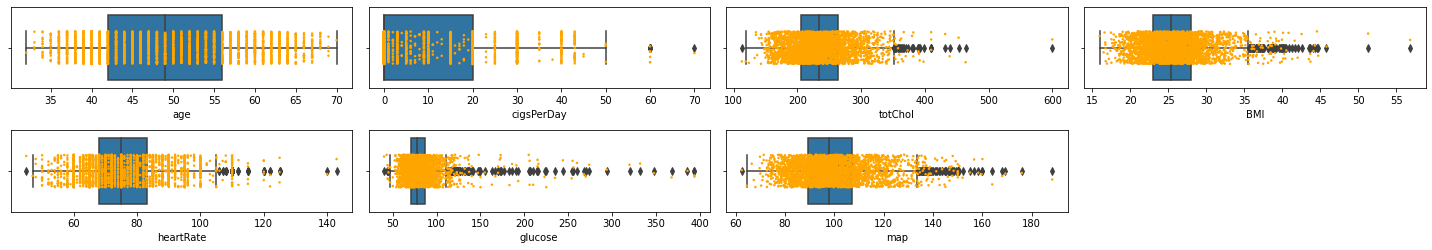

In [21]:
# looking for outliers of every fearture of dataset with the help of boxplot
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
num_it = 1 

for col in numerical:
    plt.subplot(6,4,num_it)
    sns.boxplot(dataf[col])
    sns.stripplot(dataf[col], color="orange", jitter=0.2, size=2.5)

    num_it+=1
    
plt.tight_layout()

It seems that features like- BMI, totChol, cigsPerday, heartRate, glucose, map containing outliers now limiting dataset from 5% to 95% to deal with outliers.

In [22]:
##Dealing with the outliers by Capping the outlier rows with Percentiles
for col in numerical:
  upper_lim = dataf[col].quantile(.95)
  lower_lim = dataf[col].quantile(.05)
  dataf.loc[(dataf[col] > upper_lim),col] = upper_lim
  dataf.loc[(dataf[col] < lower_lim),col] = lower_lim

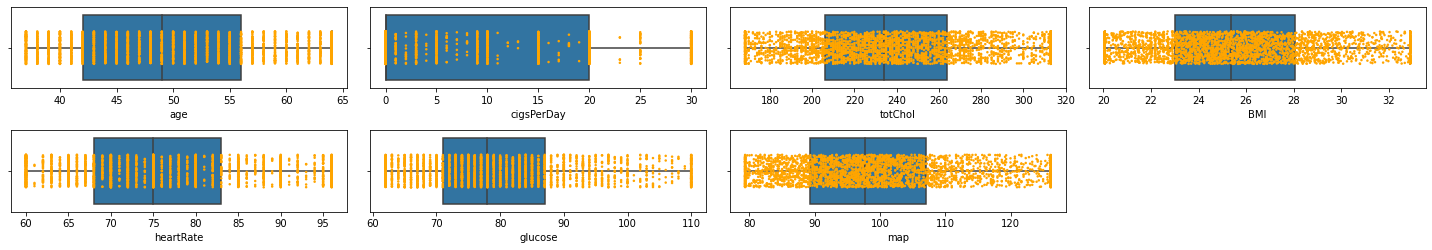

In [23]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
num_it = 1 

for col in numerical:
    plt.subplot(6,4,num_it)
    sns.boxplot(dataf[col])
    sns.stripplot(dataf[col], color="orange", jitter=0.2, size=2.5)

    num_it+=1
    
plt.tight_layout()

no outlier present

In [24]:
categorical = [var for var in dataf.columns if var not in numerical]
print('There are {} categorical variables'.format(len(categorical)))
print(categorical)

There are 5 categorical variables
['sex', 'BPMeds', 'prevalentStroke', 'diabetes', 'Heart_Disease']


#Percentage of persons with heart problem out of total

0    2483
1     444
Name: Heart_Disease, dtype: int64


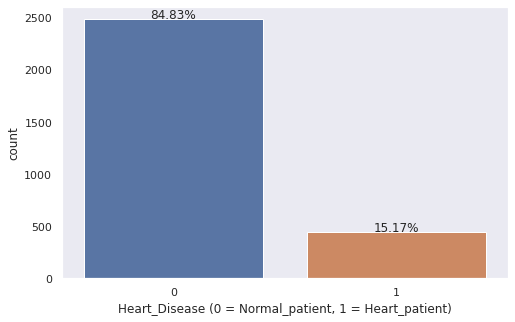

In [27]:
sns.set(style="dark")
plt.figure(figsize=(8,5))
  
ax = sns.countplot(dataf['Heart_Disease'])
target_temp = dataf['Heart_Disease'].value_counts()
plt.xlabel('Heart_Disease (0 = Normal_patient, 1 = Heart_patient)')
total = float(len(dataf['Heart_Disease']))
# for showing the percentage
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2., height + 10,'{:.2f}%'.format(100*height/total), ha="center") 
print(target_temp)

##### **There are 15% people are suffering from Heart Disease according to given dataset.**

#Univariate analysis of Categorical features

0    2848
1      79
Name: diabetes, dtype: int64


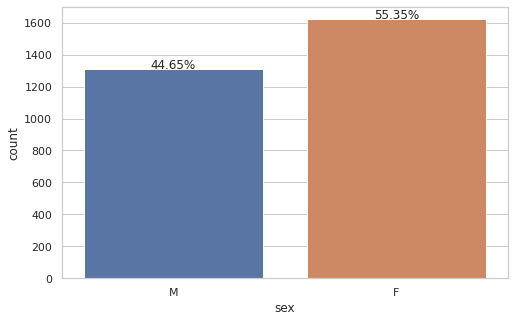

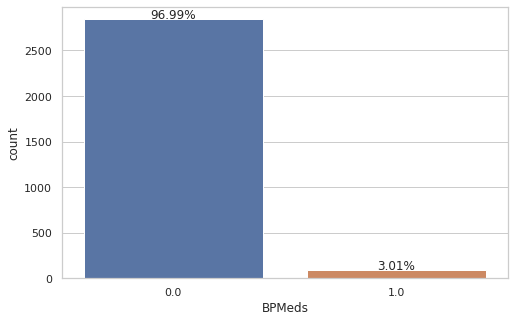

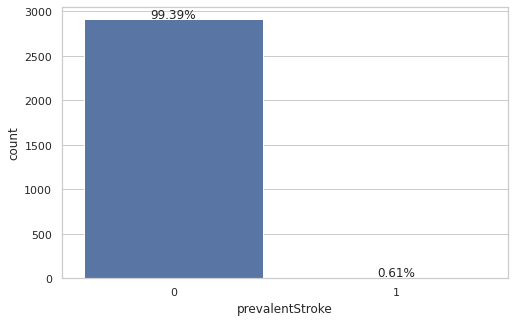

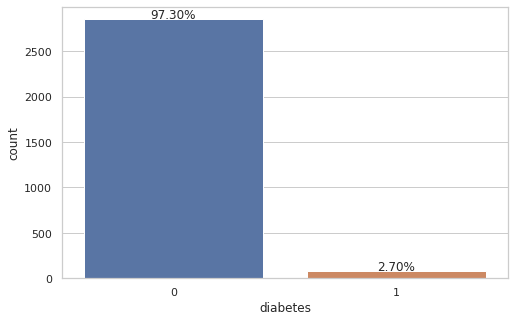

In [28]:
for i,j in enumerate(categorical[:-1]):
  sns.set(style="whitegrid")
  plt.figure(figsize=(8,5))
  
  ax = sns.countplot(dataf[j])
  target_temp = dataf[j].value_counts()
  
  total = float(len(dataf[j]))
  # for showing the percentage
  for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 10,'{:.2f}%'.format(100*height/total), ha="center") 
print(target_temp)

1. Dataset given containing 45% male and 55% female.
2. Here i the given dataset 3% people on BP_medication.
3. Only 0.61% prevalence of heart stroke.
4. Appox 3% person have diabetes. 

#Univariate analysis of Numerical features

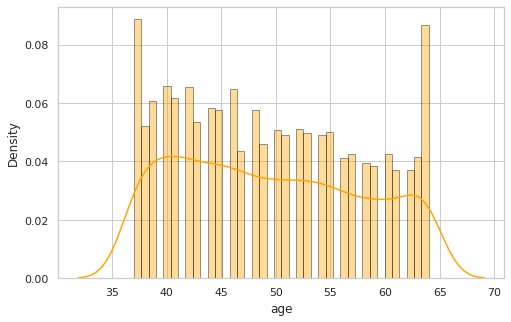

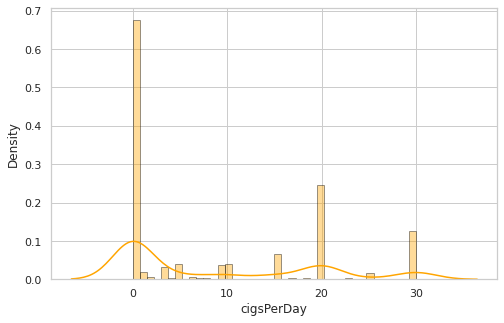

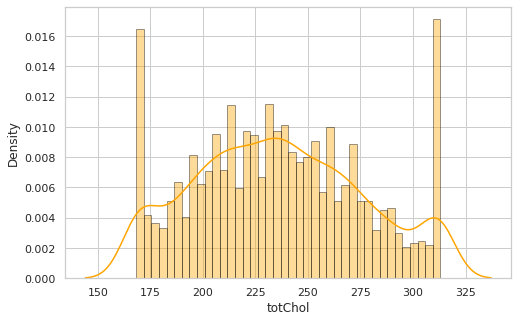

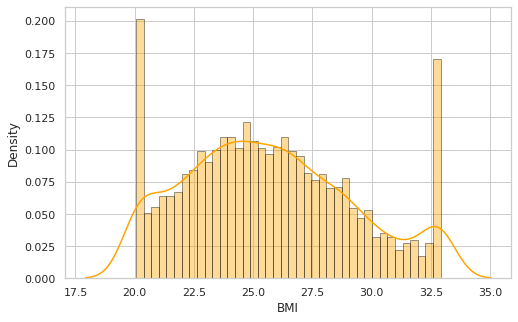

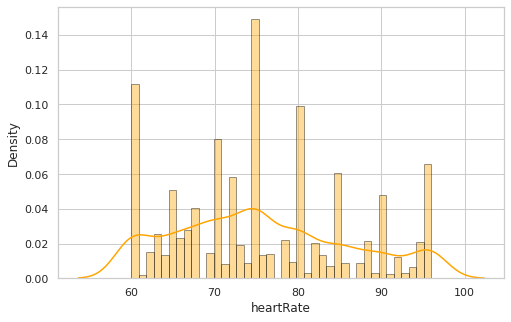

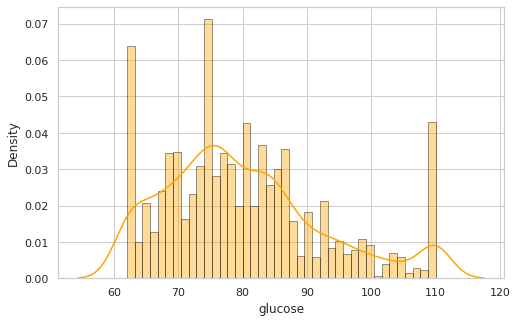

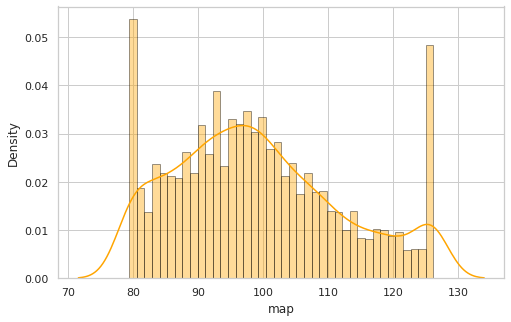

In [29]:
#Density Plot and Histogram of all arrival delays
for i,j in enumerate(numerical):
  plt.figure(figsize=(8,5))
  sns.distplot(a=dataf[j], bins=40, color='orange',
             hist_kws={"edgecolor": 'black'})
  plt.show()
 
# visualizing plot using matplotlib.pyplot library


# **Bivariate Analysis**

#Heart problem on the basis of Gender

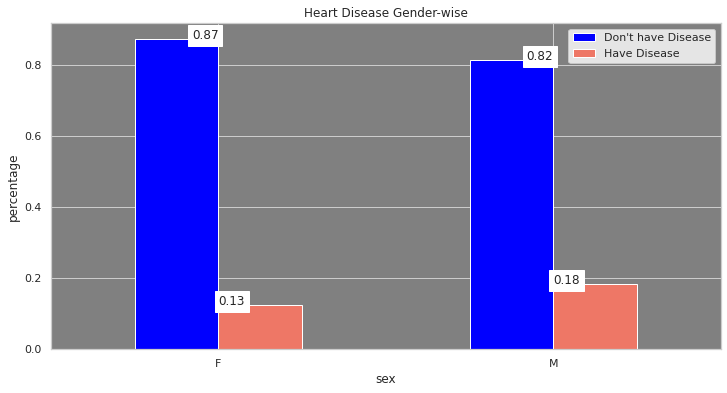

In [30]:

crs = pd.crosstab(dataf.sex,dataf.Heart_Disease, normalize='index')
crs.plot(kind="bar",figsize=(12,6),color=['blue','#EE7766' ]).set_facecolor('grey')
plt.title('Heart Disease Gender-wise')

plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('percentage')
lis= []
for i in range(crs.shape[0]):
  for j in range(crs.shape[1]):
    a = crs.iloc[j][i]
    lis.append(a)
lis1 = lis[:2]
lis2 = lis[2:]
for index, value in enumerate(lis1):
  plt.text(index, value, round(value,2), ha = 'right',Bbox = dict(facecolor = 'white', alpha = 1))
for index, value in enumerate(lis2):
  plt.text(index, value, round(value,2), ha = 'left',Bbox = dict(facecolor = 'white', alpha = 1))

plt.show()

Thus male are more prone to have heart disease.

##Effect of BP Medicines on Heart

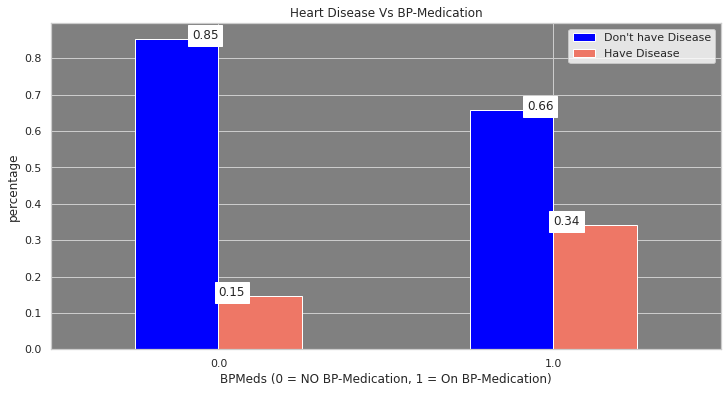

In [ ]:
crs = pd.crosstab(dataf.BPMeds,dataf.Heart_Disease, normalize='index')
crs.plot(kind="bar",figsize=(12,6),color=['blue','#EE7766' ]).set_facecolor('grey')
plt.title('Heart Disease Vs BP-Medication')
plt.xlabel('BPMeds (0 = NO BP-Medication, 1 = On BP-Medication)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('percentage')
lis= []
for i in range(crs.shape[0]):
  for j in range(crs.shape[1]):
    a = crs.iloc[j][i]
    lis.append(a)
lis1 = lis[:2]
lis2 = lis[2:]
for index, value in enumerate(lis1):
  plt.text(index, value, round(value,2), ha = 'right',Bbox = dict(facecolor = 'white', alpha = 1))
for index, value in enumerate(lis2):
  plt.text(index, value, round(value,2), ha = 'left',Bbox = dict(facecolor = 'white', alpha = 1))

plt.show()

##Stroke effect on Heart

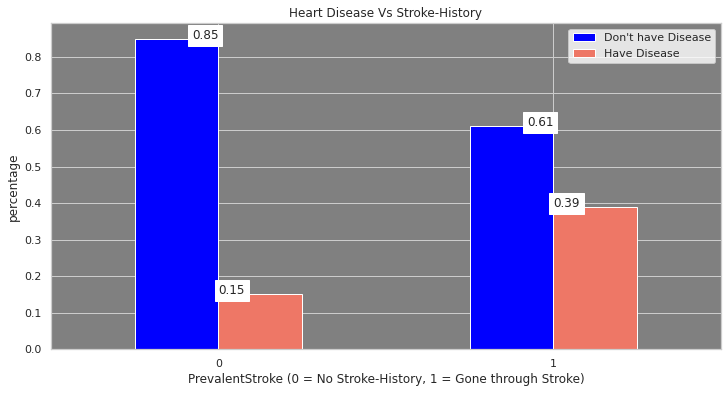

In [ ]:
crs = pd.crosstab(dataf.prevalentStroke,dataf.Heart_Disease, normalize='index')
crs.plot(kind="bar",figsize=(12,6),color=['blue','#EE7766' ]).set_facecolor('grey')
plt.title('Heart Disease Vs Stroke-History')
plt.xlabel('PrevalentStroke (0 = No Stroke-History, 1 = Gone through Stroke)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('percentage')
lis= []
for i in range(crs.shape[0]):
  for j in range(crs.shape[1]):
    a = crs.iloc[j][i]
    lis.append(a)
lis1 = lis[:2]
lis2 = lis[2:]
for index, value in enumerate(lis1):
  plt.text(index, value, round(value,2), ha = 'right',Bbox = dict(facecolor = 'white', alpha = 1))
for index, value in enumerate(lis2):
  plt.text(index, value, round(value,2), ha = 'left',Bbox = dict(facecolor = 'white', alpha = 1))


plt.show()

#Effect of Diabetes on Heart Disease

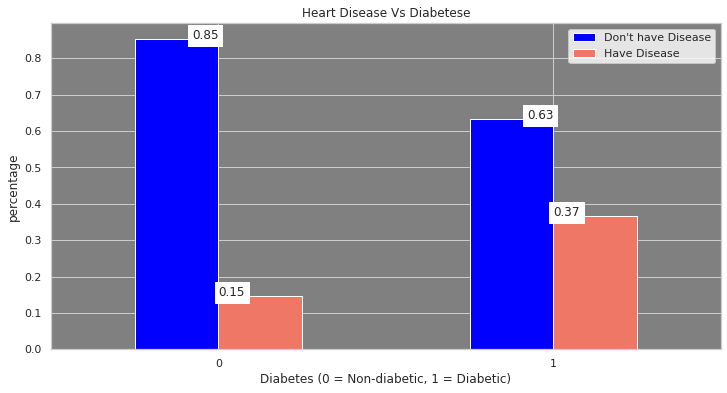

In [ ]:
crs = pd.crosstab(dataf.diabetes,dataf.Heart_Disease, normalize='index')
crs.plot(kind="bar",figsize=(12,6),color=['blue','#EE7766' ]).set_facecolor('grey')
plt.title('Heart Disease Vs Diabetese')
plt.xlabel('Diabetes (0 = Non-diabetic, 1 = Diabetic)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('percentage')
lis= []
for i in range(crs.shape[0]):
  for j in range(crs.shape[1]):
    a = crs.iloc[j][i]
    lis.append(a)
lis1 = lis[:2]
lis2 = lis[2:]
for index, value in enumerate(lis1):
  plt.text(index, value, round(value,2), ha = 'right',Bbox = dict(facecolor = 'white', alpha = 1))
for index, value in enumerate(lis2):
  plt.text(index, value, round(value,2), ha = 'left',Bbox = dict(facecolor = 'white', alpha = 1))


plt.show()

##Effect of age on heart problem

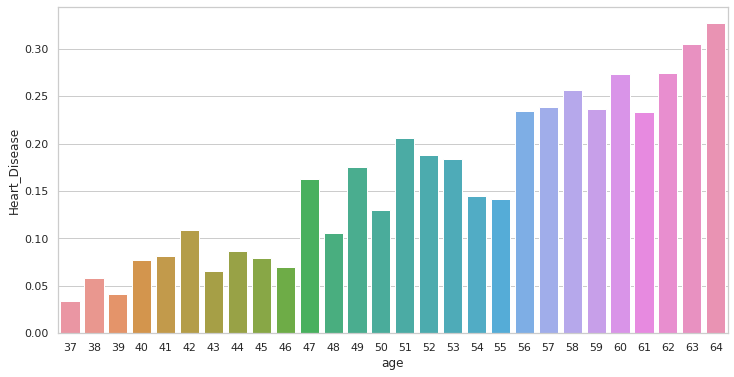

In [ ]:
avg = dataf[["age", "Heart_Disease"]].groupby(['age'], as_index=False).mean() #sum of 1's and 0's in hear_disease and divided by total no. of 1's and 0's for a prticular age(eg 37yr).
plt.figure(figsize=(12,6))
sns.barplot(x='age',y='Heart_Disease', data=avg)

plt.show()

#Effect of Cigretts on Heart

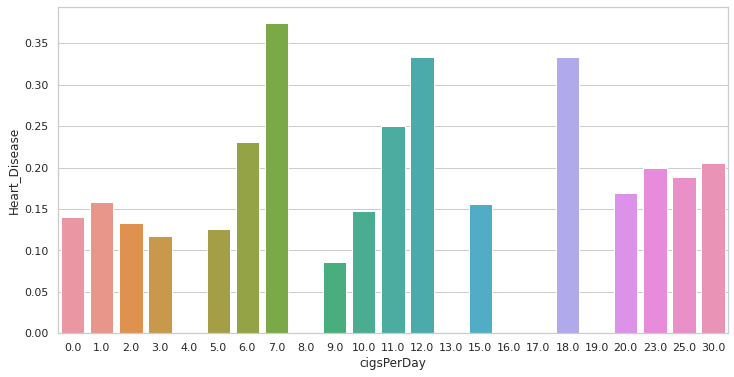

In [ ]:
avg1 = dataf[["cigsPerDay", "Heart_Disease"]].groupby(['cigsPerDay'], as_index=False).mean()
plt.figure(figsize=(12,6))
sns.barplot(x='cigsPerDay', y='Heart_Disease', data=avg1)

plt.show()

#Cholesterol Vs Heart Disease

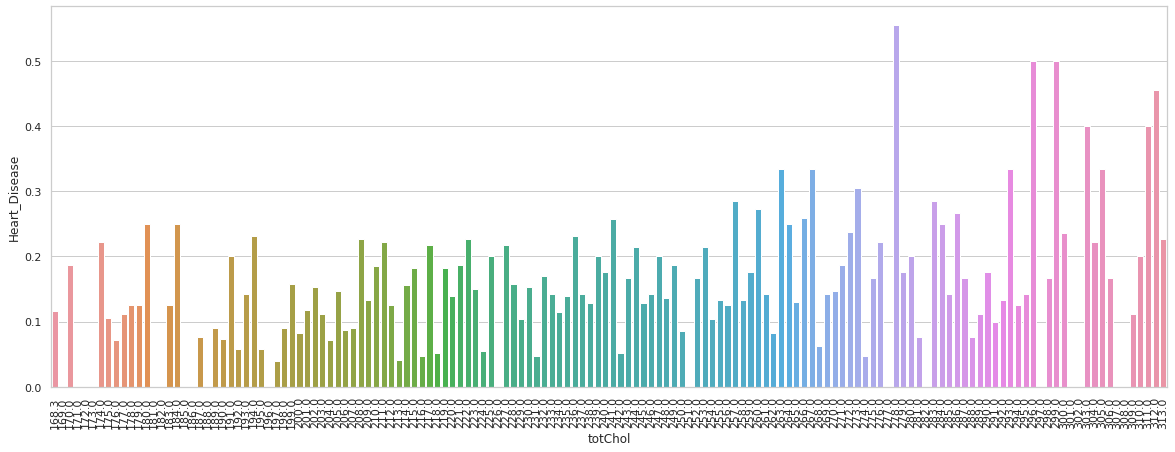

In [ ]:
avg2 = dataf[["totChol", "Heart_Disease"]].groupby(['totChol'], as_index=False).mean() #sum of 1's and 0's in hear_disease and divided by total no. of 1's and 0's for a prticular age(eg 37yr).
plt.figure(figsize=(20,7))
sns.barplot(x='totChol', y='Heart_Disease', data=avg2)

plt.xticks(rotation = 90)
plt.show()

#BMI Vs Heart Disease

Text(0.5, 1.0, 'Relation between BMI and Heart_Disease')

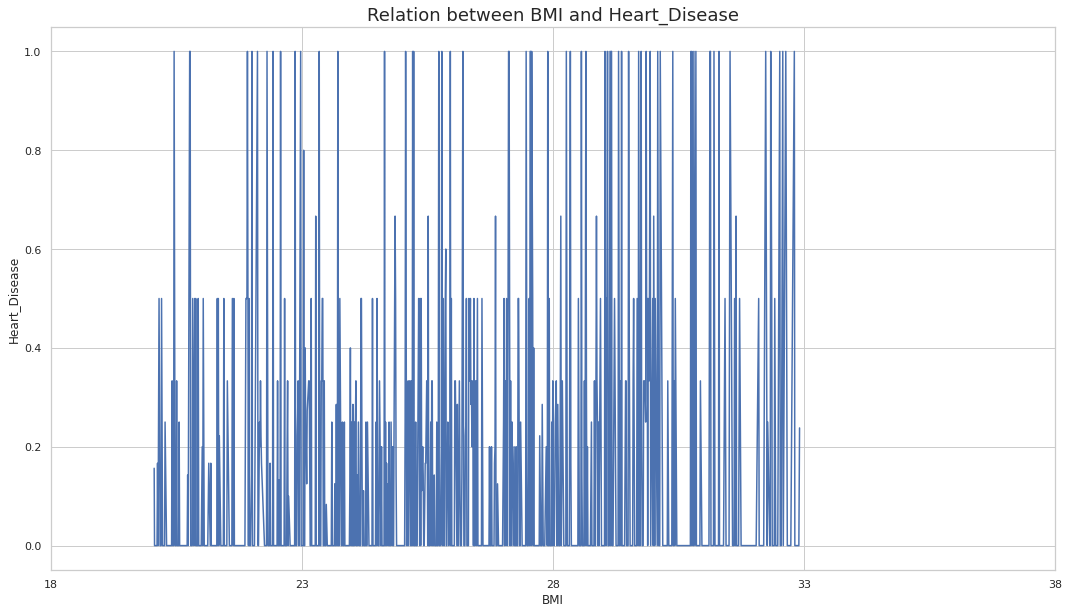

In [ ]:
ds_t=dataf.groupby('BMI').agg({'Heart_Disease':'mean'}).reset_index()
plt.rcParams['figure.figsize'] = 18,10
sns.lineplot(ds_t['BMI'],ds_t['Heart_Disease'])
plt.xticks(np.arange(18, 40, 5))
plt.xlabel('BMI',fontsize=12)
plt.ylabel('Heart_Disease',fontsize=12)
plt.title('Relation between BMI and Heart_Disease',fontsize=18)

#Heart Rate Vs Heart Disease

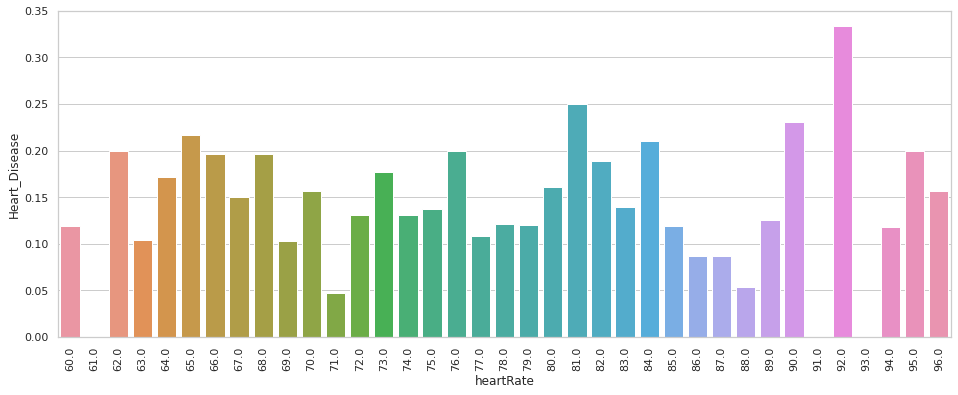

In [ ]:
avg4 = dataf[["heartRate", "Heart_Disease"]].groupby(['heartRate'], as_index=False).mean() #sum of 1's and 0's in hear_disease and divided by total no. of 1's and 0's for a prticular age(eg 37yr).
plt.figure(figsize=(16,6))
sns.barplot(x='heartRate', y='Heart_Disease', data=avg4)
ax.set(xlabel='heartRate', ylabel='disease probability')
plt.xticks(rotation = 90)
plt.show()

#Glucose level Vs Heart Disease

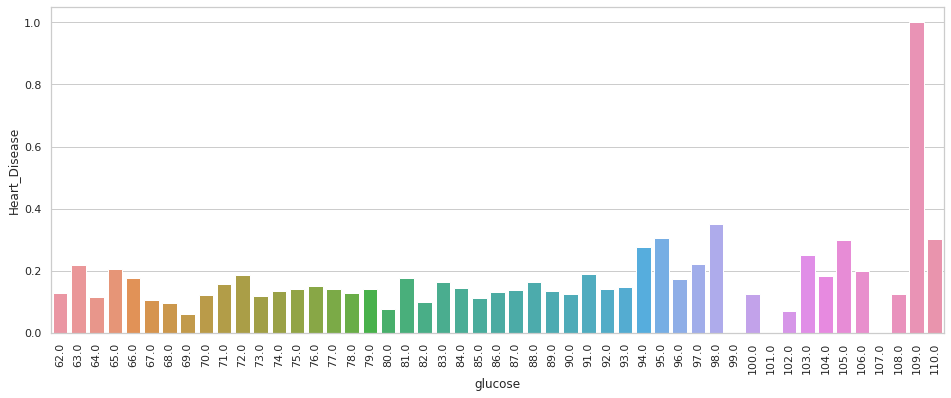

In [ ]:
avg5 = dataf[["glucose", "Heart_Disease"]].groupby(['glucose'], as_index=False).mean() #sum of 1's and 0's in hear_disease and divided by total no. of 1's and 0's for a prticular age(eg 37yr).
plt.figure(figsize=(16,6))
sns.barplot(x='glucose', y='Heart_Disease', data=avg5)
ax.set(xlabel='glucose', ylabel='disease probability')
plt.xticks(rotation = 90)
plt.show()

#MAP (Mean Arterial Pressure) Vs Heart Disease

Text(0.5, 1.0, 'Map of heart disease patients')

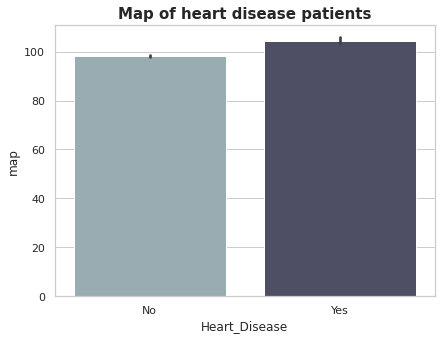

In [ ]:
#plotting heart patients
fig,ax1=plt.subplots(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,1))
sns.barplot(x=dataf['Heart_Disease'],y=dataf['map'],palette='bone_r')
ax1.set(xticklabels = (['No','Yes']))
plt.title('Map of heart disease patients', fontsize=15, weight='bold' )

Text(0.5, 1.0, 'Relation between MAP and Heart Disease ')

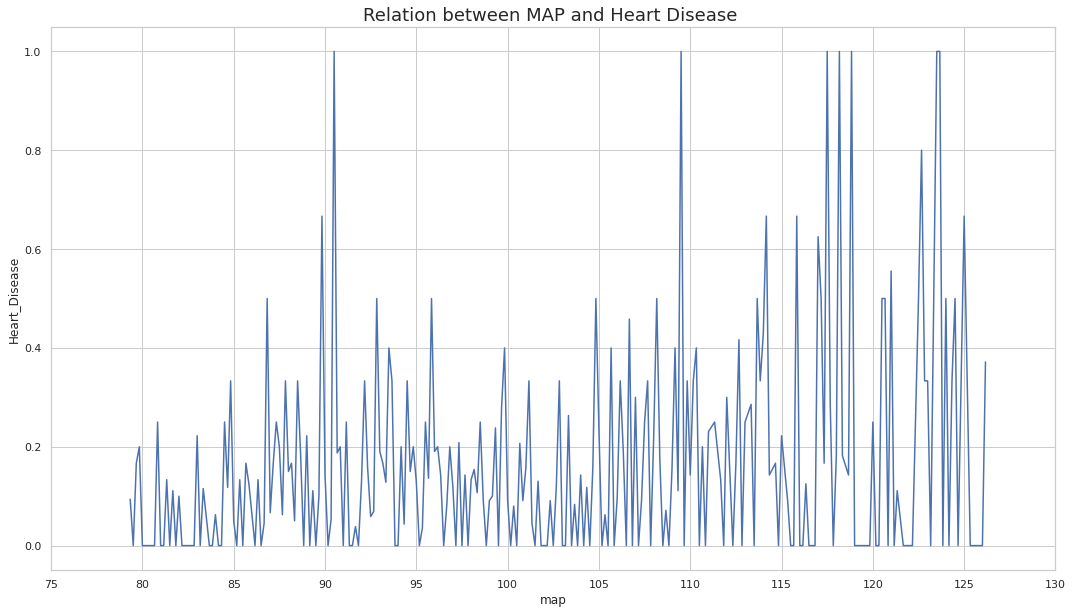

In [ ]:
ds_t=dataf.groupby('map').agg({'Heart_Disease':'mean'}).reset_index()
plt.rcParams['figure.figsize'] = 18,10
sns.lineplot(ds_t['map'],ds_t['Heart_Disease'])
plt.xticks(np.arange(75, 135, 5))
plt.xlabel('map',fontsize=12)
plt.ylabel('Heart_Disease',fontsize=12)
plt.title('Relation between MAP and Heart Disease ',fontsize=18)

# **Categorical Encoding**

In [ ]:
# Categorical encoding for smoking column (1='M' and 2 ='F')
dataf['sex'].replace({'M':0,'F':1},inplace=True)

In [ ]:
dataf.head()

,age,sex,cigsPerDay,BPMeds,prevalentStroke,diabetes,totChol,BMI,heartRate,glucose,Heart_Disease,map
1,37,0,0.0,0.0,0,0,212.0,29.77,72.0,75.0,0,121.333
2,46,1,10.0,0.0,0,0,250.0,20.35,88.0,94.0,0,86.000
3,50,0,20.0,0.0,0,0,233.0,28.26,68.0,94.0,1,111.333
4,64,1,30.0,0.0,0,0,241.0,26.42,70.0,77.0,0,102.167
5,61,1,0.0,0.0,0,0,272.0,32.80,85.0,65.0,1,126.167


**Segregating dependent and independent features** 

In [ ]:
# Splitting the data into set of independent variables and a dependent variable.
X = dataf.drop('Heart_Disease',axis=1)
y = dataf['Heart_Disease']

### **Using SMOTE to handle imbalance data.**

 **let's know about SMOTE in a glance.**

This is a statistical technique for increasing the number of cases in your dataset in a balanced way. The module works by generating new instances from existing minority cases that you supply as input. This implementation of SMOTE does not change the number of majority cases. SMOTE takes the entire dataset as an input, but it increases the percentage of only the minority cases.

In [ ]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [ ]:
# define pipeline
under = RandomUnderSampler(sampling_strategy=0.8)
over = SMOTE(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_smote, y_smote = pipeline.fit_resample(X, y)

# **Modeling**

In [ ]:
# spliting the data into train test form
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.20)

#Standardisation of data

In [ ]:
# scaling the data using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
train_pred = lr_model.predict_proba(X_train)
test_pred = lr_model.predict_proba(X_test)

In [ ]:
test_pred

array([[0.80446741, 0.19553259],
       [0.88076626, 0.11923374],
       [0.25493169, 0.74506831],
       ...,
       [0.85183898, 0.14816102],
       [0.25909714, 0.74090286],
       [0.49116156, 0.50883844]])

In [ ]:
# Getting the predicted classes
X_pred_lr = lr_model.predict(X_train)
y_pred_lr = lr_model.predict(X_test)

In [ ]:
#predicting probability
y_pred_proba_lr = lr_model.predict_proba(X_test)[:,1]

In [ ]:
# Defining a function to train the input model and print evaluation matrix
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
def analyse_model(model, X_train, X_test, y_train, y_test):

  '''Takes classifier model and train test splits as input and prints the
  evaluation matrices with the plot and returns the model'''

  # Feature importances
  try:
    try:
      importance = model.feature_importances_
      feature = features
    except:
      importance = np.abs(model.coef_[0])
      feature = X
    indices = np.argsort(importance)
    indices = indices[::-1]
  except:
    pass

  # Plotting Evaluation Metrics for train and test dataset
  for x, act, label in ((X_train, y_train, 'Train-Set'),(X_test, y_test, "Test-Set")):

    # Getting required metrics
    pred = model.predict(x)
    pred_proba = model.predict_proba(x)[:,1]
    report = pd.DataFrame(classification_report(y_pred=pred, y_true=act, output_dict=True))
    fpr, tpr, thresholds = roc_curve(act, pred_proba)
        # Classification report
    plt.figure(figsize=(18,3))
    plt.subplot(1,3,1)
    sns.heatmap(report.iloc[:-1, :-1].T, annot=True, cmap='coolwarm',fmt='.2f')
    plt.title(f'{label} Report')
    # Confusion Matrix
    plt.subplot(1,3,2)
    sns.heatmap(confusion_matrix(y_true=act, y_pred=pred), annot=True, cmap='coolwarm',fmt='.2f')
    plt.title(f'{label} Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')
    
    # AUC_ROC Curve
    plt.subplot(1,3,3)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
    plt.legend(loc=4)
    plt.title(f'{label} AUC_ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()

  # Plotting Feature Importance
  try:
    plt.figure(figsize=(18,3))
    plt.bar(range(len(indices)),importance[indices])
    plt.xticks(range(len(indices)), [feature[i] for i in indices])
    plt.title('Feature Importance')
    plt.tight_layout()
  except:
    pass
  plt.show()

  return model

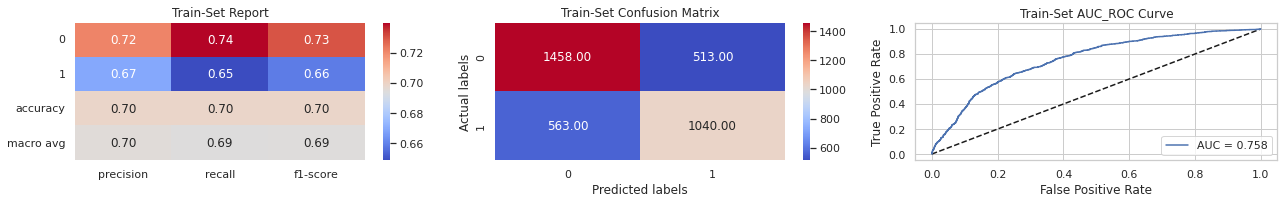

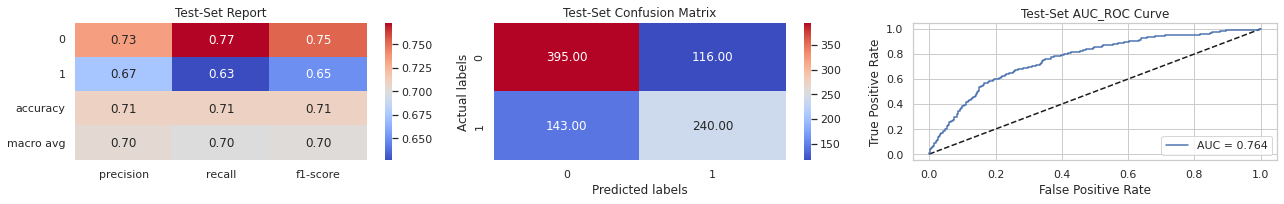

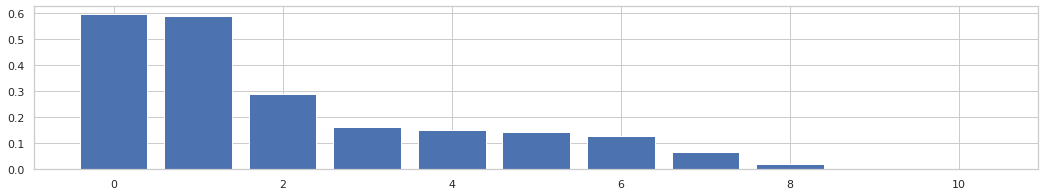

LogisticRegression(max_iter=10000)

In [ ]:
# Logistic Regression model
analyse_model(lr_model,X_train,X_test,y_train,y_test)

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,ROC
0,Logistic Regression,0.710291,0.674157,0.626632,0.772994,0.649526,0.763792


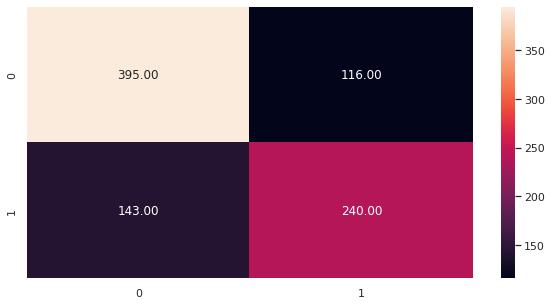

In [ ]:
from sklearn.metrics import confusion_matrix,roc_auc_score,precision_score,recall_score,f1_score,accuracy_score
CM=confusion_matrix(y_test,y_pred_lr)
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(CM, annot=True,fmt='.2f', ax=ax)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_lr)
roc=roc_auc_score(y_test, y_pred_proba_lr)
prec = precision_score(y_test, y_pred_lr)
rec = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

evaluation_metrics1 =pd.DataFrame([['Logistic Regression',acc, prec,rec,specificity, f1,roc]],
columns = ['Model', 'Accuracy','Precision', 'Recall','Specificity', 'F1 Score','ROC'])

evaluation_metrics1

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,20)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)

# Fit the object to train dataset
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [ ]:
knn_cv.best_params_

{'n_neighbors': 2}

In [ ]:
y_pred_knn = knn_cv.predict(X_test)


In [ ]:
#predicting probability
y_pred_proba_knn = knn_cv.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.metrics import roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn import metrics


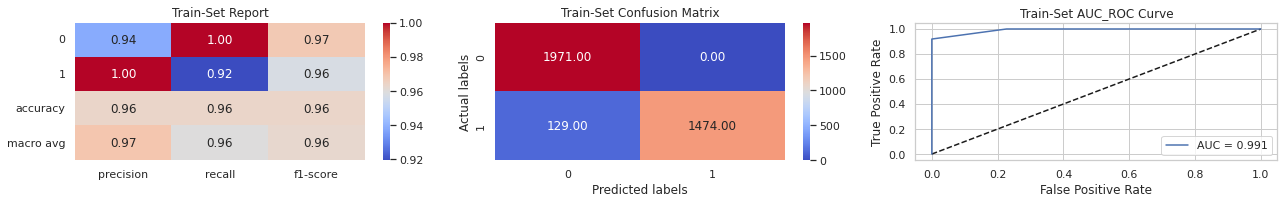

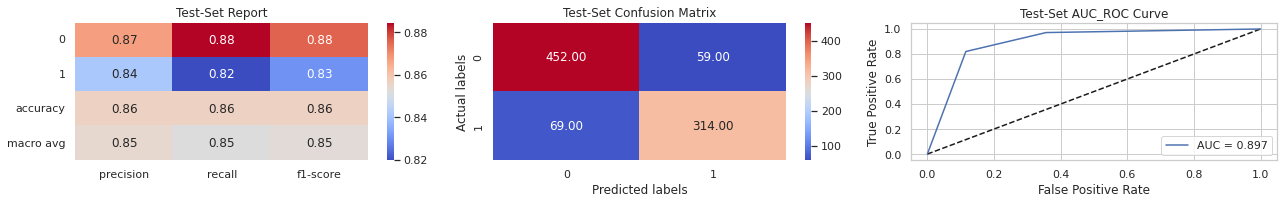

<Figure size 1296x216 with 0 Axes>

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [ ]:
# Analysis of KNN model
analyse_model(knn_cv,X_train,X_test,y_train,y_test)

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,ROC
0,KNN,0.856823,0.841823,0.819843,0.88454,0.830688,0.897485


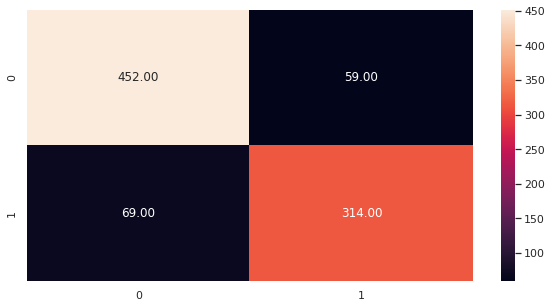

In [ ]:
CM=confusion_matrix(y_test,y_pred_knn)
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(CM, annot=True, fmt='.2f',ax=ax)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_knn)
roc=roc_auc_score(y_test, y_pred_proba_knn)
prec = precision_score(y_test, y_pred_knn)
rec = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

evaluation_metrics2 =pd.DataFrame([['KNN',acc, prec,rec,specificity, f1,roc]],
columns = ['Model', 'Accuracy','Precision', 'Recall','Specificity', 'F1 Score','ROC'])

evaluation_metrics2

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
classifier_sm = RandomForestClassifier() 
grid_values_sm = {'n_estimators':[90,100,110], 'max_leaf_nodes':[110,115,120], 'max_depth':[13,14,15]}
classifier = GridSearchCV(classifier_sm, param_grid = grid_values_sm, scoring = 'roc_auc', cv=5)

In [ ]:
# Fit the object to train dataset
classifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [13, 14, 15],
                         'max_leaf_nodes': [110, 115, 120],
                         'n_estimators': [90, 100, 110]},
             scoring='roc_auc')

In [ ]:
classifier.best_params_

{'max_depth': 14, 'max_leaf_nodes': 120, 'n_estimators': 100}

In [ ]:
#predicting class
y_pred_rf =classifier.predict(X_test)


In [ ]:
#predicting probability
y_pred_proba_rf = classifier.predict_proba(X_test)[:,1]

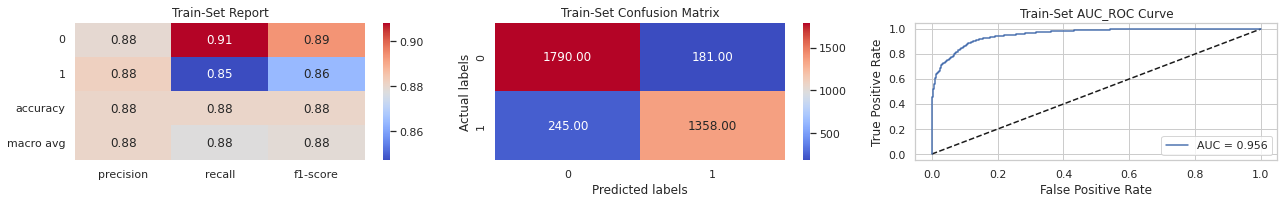

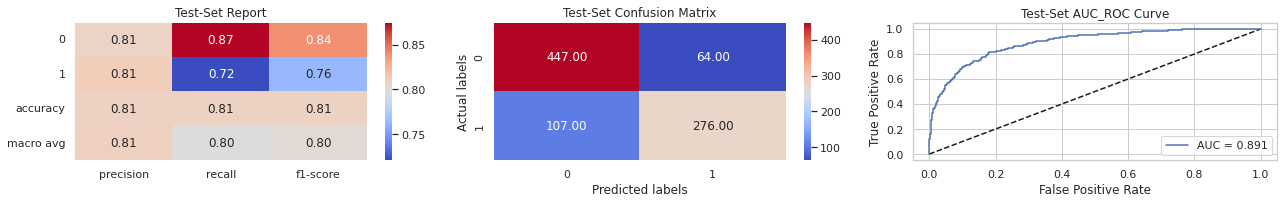

<Figure size 1296x216 with 0 Axes>

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [13, 14, 15],
                         'max_leaf_nodes': [110, 115, 120],
                         'n_estimators': [90, 100, 110]},
             scoring='roc_auc')

In [ ]:
# Analysing model Random forest model
analyse_model(classifier,X_train,X_test,y_train,y_test)

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,ROC
0,Random Forest,0.808725,0.811765,0.720627,0.874755,0.763485,0.891479


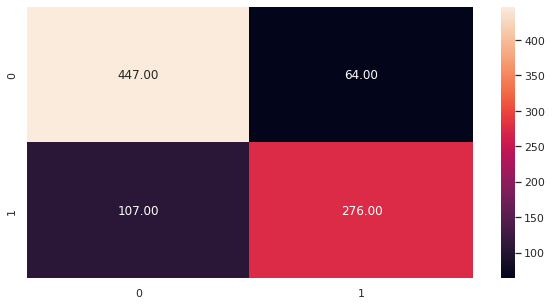

In [ ]:
# evaluation metric and confusion matrix for Random Forest model
CM=confusion_matrix(y_test,y_pred_rf)
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(CM, annot=True, fmt='.2f',ax=ax)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_rf)
roc=roc_auc_score(y_test, y_pred_proba_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

evaluation_metrics3 =pd.DataFrame([['Random Forest',acc, prec,rec,specificity, f1,roc]],
columns = ['Model', 'Accuracy','Precision', 'Recall','Specificity', 'F1 Score','ROC'])

evaluation_metrics3

In [ ]:
optimal_rf=classifier.best_estimator_

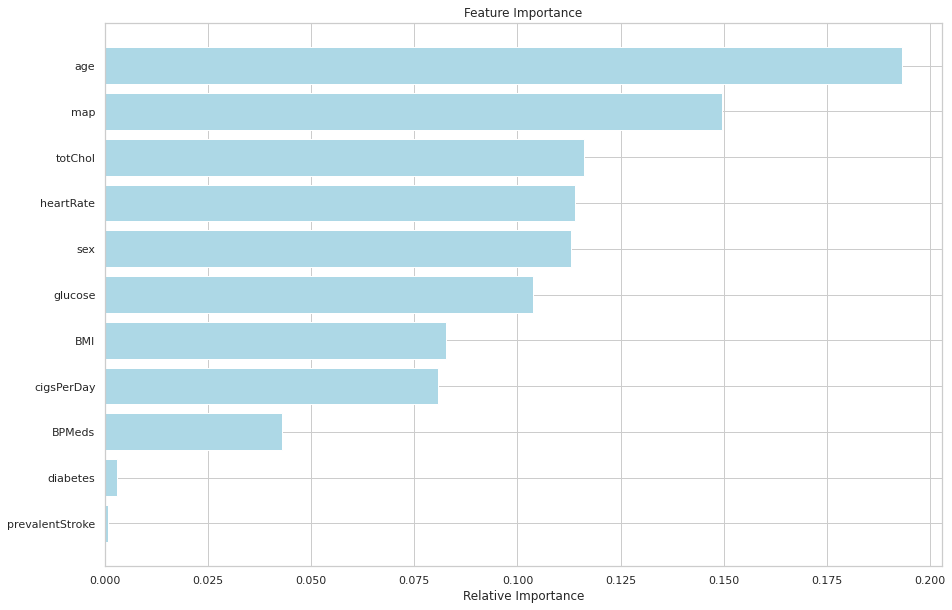

In [ ]:
#shows the graph of feature importance
features = X.columns
importances = optimal_rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='#ADD8E6', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#XG Boost

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBClassifier()

In [ ]:
#creating param dict for gridsearch
n_estimators=[170,175,180]
max_depth=[20,25,30]
params = {'n_estimators':n_estimators,'max_depth':max_depth }

#creating xgb grid model
xgb= GridSearchCV(xgb_model,param_grid=params,verbose=0)

# Fitting model
xgb.fit(X_train,y_train)

GridSearchCV(estimator=XGBClassifier(),
             param_grid={'max_depth': [20, 25, 30],
                         'n_estimators': [170, 175, 180]})

In [ ]:
#best parameters
xgb.best_params_

{'max_depth': 25, 'n_estimators': 180}

In [ ]:
#predicting class
y_pred_xgb = xgb.predict(X_test)

#predicting probability
y_pred_proba_xgb = xgb.predict_proba(X_test)[:,1]

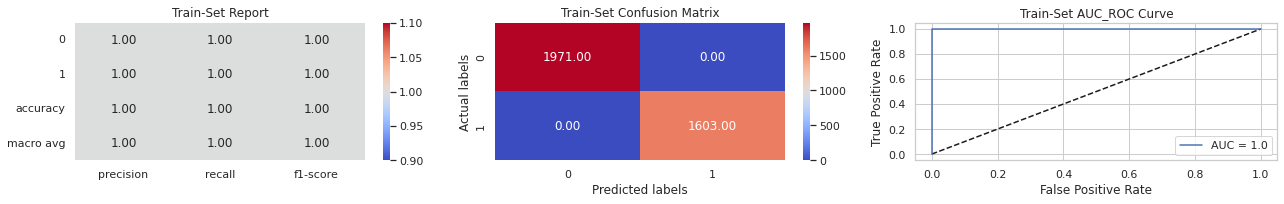

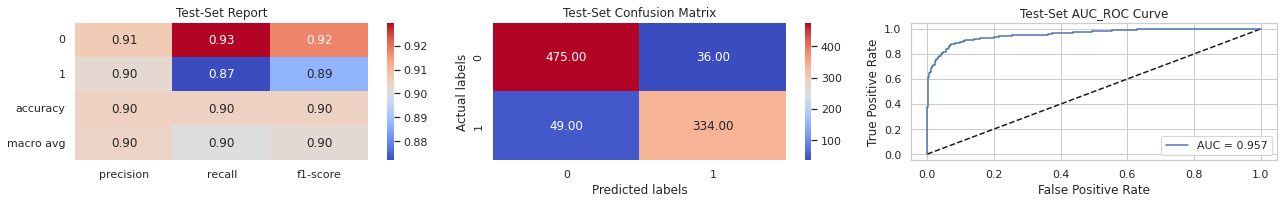

<Figure size 1296x216 with 0 Axes>

GridSearchCV(estimator=XGBClassifier(),
             param_grid={'max_depth': [20, 25, 30],
                         'n_estimators': [170, 175, 180]})

In [ ]:
# Analysing XG Boost model
analyse_model(xgb,X_train,X_test,y_train,y_test)

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,ROC
0,XGBoost,0.904922,0.902703,0.872063,0.92955,0.887118,0.957453


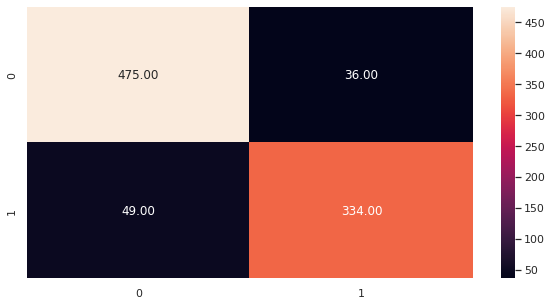

In [ ]:
# evaluation metric and confusion matrix for XG Boost model
CM=confusion_matrix(y_test,y_pred_xgb)
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(CM, annot=True, fmt='.2f',ax=ax)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_xgb)
roc=roc_auc_score(y_test, y_pred_proba_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

evaluation_metrics4 =pd.DataFrame([['XGBoost',acc, prec,rec,specificity, f1,roc]],
columns = ['Model', 'Accuracy','Precision', 'Recall','Specificity', 'F1 Score','ROC'])

evaluation_metrics4

In [ ]:
# best estimator
optimal_xgb=xgb.best_estimator_

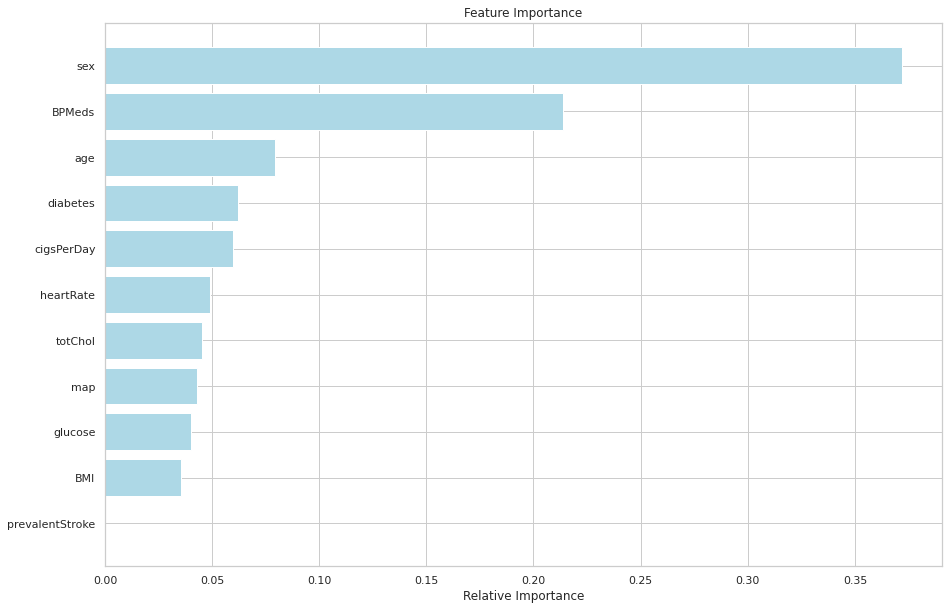

In [ ]:
#graph of feature importance
features = X.columns
importances = optimal_xgb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='#ADD8E6', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#Support Vector Classifier

In [ ]:
# importing support vector classifier
from sklearn.svm import SVC

In [ ]:
# Support vector classifier
svc = SVC()

# running grid search for optimal parameters
param_grid = {'C': [0.1,1, 10], 
              'gamma': [1,0.1,0.01],
              'kernel': ['linear','rbf','sigmoid'],
              'probability':[True]}
 
svm_classifier = GridSearchCV(svc, param_grid,cv=2)

#fitting model
svm_classifier.fit(X_train,y_train)

#Predicting
y_pred_svc = svm_classifier.predict(X_test)

#predicting probability
y_pred_proba_svc = svm_classifier.predict_proba(X_test)[:,1]

In [ ]:
# Support vector classification model's best parameters
svm_classifier.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf', 'probability': True}

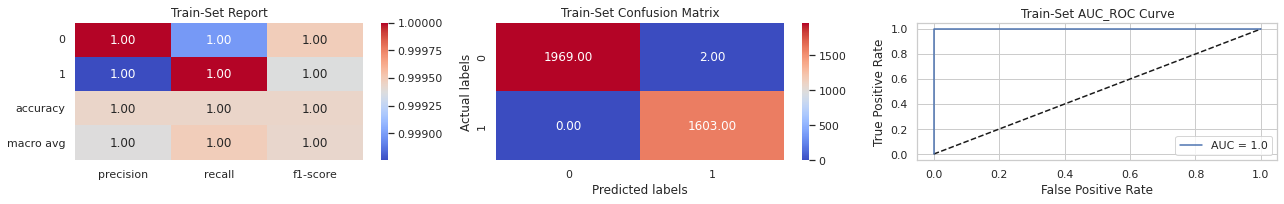

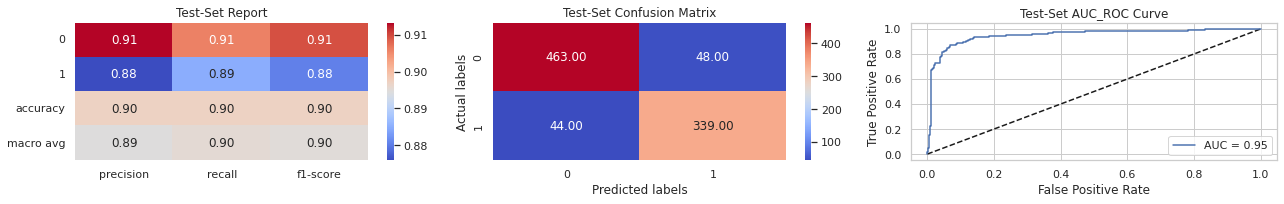

<Figure size 1296x216 with 0 Axes>

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['linear', 'rbf', 'sigmoid'],
                         'probability': [True]})

In [ ]:
# Analysing Support vector classication model
analyse_model(svm_classifier,X_train,X_test,y_train,y_test)

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,ROC
0,SupportVector,0.897092,0.875969,0.885117,0.906067,0.880519,0.950065


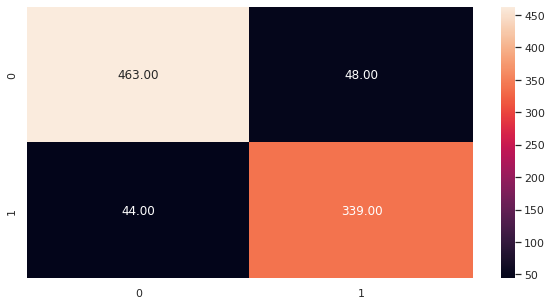

In [ ]:
# evaluation metric and confusion matrix for support vector model
CM=confusion_matrix(y_test,y_pred_svc)
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(CM, annot=True, fmt='.2f',ax=ax)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, y_pred_svc)
roc=roc_auc_score(y_test, y_pred_proba_svc)
prec = precision_score(y_test, y_pred_svc)
rec = recall_score(y_test, y_pred_svc)
f1 = f1_score(y_test, y_pred_svc)

evaluation_metrics5 =pd.DataFrame([['SupportVector',acc, prec,rec,specificity, f1,roc]],
columns = ['Model', 'Accuracy','Precision', 'Recall','Specificity', 'F1 Score','ROC'])

evaluation_metrics5

#Model Evaluation Matrix

In [ ]:
# Evaluation metrics list
evaluation_metrics = [evaluation_metrics1,evaluation_metrics2,evaluation_metrics3,
                      evaluation_metrics4,evaluation_metrics5]

In [ ]:
# Concatnating all evaluation metrics into one DataFrame
em_list=pd.concat(evaluation_metrics).reset_index(drop=True).set_index('Model')

# using seaborn color palette as well as
# min('lighblue'), mid(green), max('blue') values
cm = sns.light_palette("lightgreen", as_cmap=True)

em_list.style.background_gradient(cmap=cm).set_precision(2).highlight_min(axis=0, color='lightgreen').highlight_max(axis=0, color='green')

,Accuracy,Precision,Recall,Specificity,F1 Score,ROC
Model,,,,,,
Logistic Regression,0.71,0.67,0.63,0.77,0.65,0.76
KNN,0.86,0.84,0.82,0.88,0.83,0.90
Random Forest,0.81,0.81,0.72,0.87,0.76,0.89
XGBoost,0.90,0.90,0.87,0.93,0.89,0.96
SupportVector,0.90,0.88,0.89,0.91,0.88,0.95


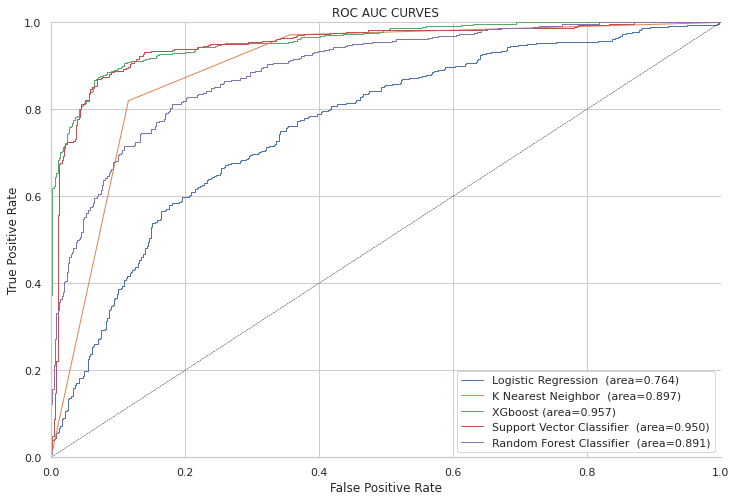

In [ ]:
# ROC_AUC bar plot of all models
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))


roc_auc_plot(y_test,lr_model.predict_proba(X_test),label='Logistic Regression ',l='-')
roc_auc_plot(y_test,knn_cv.predict_proba(X_test),label='K Nearest Neighbor ',l='-')
roc_auc_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')
roc_auc_plot(y_test,svm_classifier.predict_proba(X_test),label='Support Vector Classifier ',l='-')
roc_auc_plot(y_test,classifier.predict_proba(X_test),label='Random Forest Classifier ',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('ROC AUC CURVES')
sns.despine()

Here, we can see the highest average area under the curve (AUC) of 0.957 is attained by XG-Boost and second highest is of 0.950 attained by Support Vector Classifier.

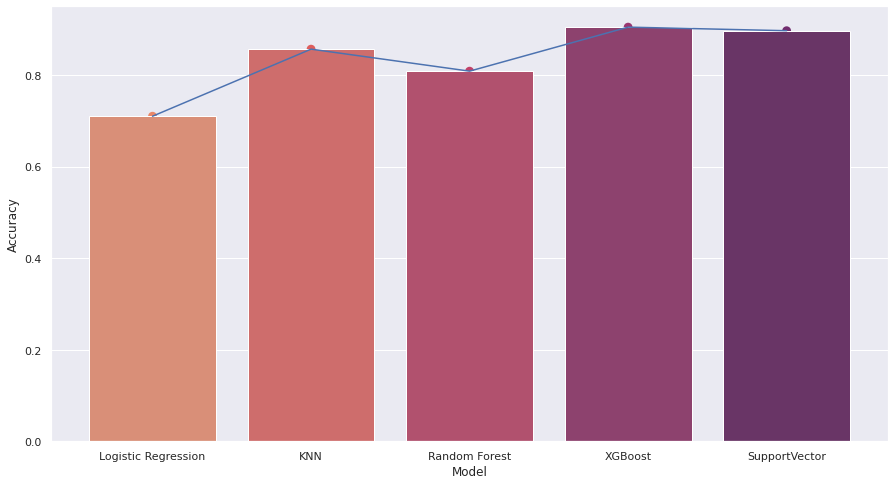

In [ ]:
#Accuracy barplot of model's
em_list = em_list.reset_index(drop=False)
sns.set(rc={'figure.figsize':(15,8)})
sns.pointplot(data=em_list,x='Model',y='Accuracy',palette = 'flare')
sns.barplot(data=em_list,x='Model',y='Accuracy',palette = 'flare')
sns.lineplot(data=em_list,x='Model',y='Accuracy',palette = 'flare')